In [167]:
import nest_asyncio
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import ccxt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns


In [58]:


import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
cg.ping()
# Define the API endpoint and parameters
endpoint = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=max'

response = requests.get(endpoint)
#response.json()
#data = response.json()['prices'][0]

df = pd.read_json(response.text)
df

,prices,market_caps,total_volumes
0,"[1367107200000, 135.3]","[1367107200000, 1500517590]","[1367107200000, 0]"
1,"[1367193600000, 141.96]","[1367193600000, 1575032004.0]","[1367193600000, 0.0]"
2,"[1367280000000, 135.3]","[1367280000000, 1501657493.0]","[1367280000000, 0.0]"
3,"[1367366400000, 117.0]","[1367366400000, 1298951550.0]","[1367366400000, 0.0]"
4,"[1367452800000, 103.43]","[1367452800000, 1148667722.0]","[1367452800000, 0.0]"
...,...,...,...
3555,"[1674432000000, 22736.66142892971]","[1674432000000, 438060367560.3554]","[1674432000000, 34124364415.43915]"
3556,"[1674518400000, 22984.87497643721]","[1674518400000, 442926343072.59235]","[1674518400000, 36750647385.65293]"
3557,"[1674604800000, 22610.010598272846]","[1674604800000, 435679436196.35767]","[1674604800000, 35621897292.95152]"
3558,"[1674691200000, 23180.422697874263]","[1674691200000, 446715261348.7517]","[1674691200000, 42772537174.72366]"


In [61]:
df = pd.read_json(response.text)
df['date_time'] = df.prices.apply(lambda x: pd.to_datetime(x[0], unit='ms'))
df.set_index('date_time', inplace=True)

In [62]:
df

,prices,market_caps,total_volumes
date_time,,,
2013-04-28 00:00:00,"[1367107200000, 135.3]","[1367107200000, 1500517590]","[1367107200000, 0]"
2013-04-29 00:00:00,"[1367193600000, 141.96]","[1367193600000, 1575032004.0]","[1367193600000, 0.0]"
2013-04-30 00:00:00,"[1367280000000, 135.3]","[1367280000000, 1501657493.0]","[1367280000000, 0.0]"
2013-05-01 00:00:00,"[1367366400000, 117.0]","[1367366400000, 1298951550.0]","[1367366400000, 0.0]"
2013-05-02 00:00:00,"[1367452800000, 103.43]","[1367452800000, 1148667722.0]","[1367452800000, 0.0]"
...,...,...,...
2023-01-23 00:00:00,"[1674432000000, 22736.66142892971]","[1674432000000, 438060367560.3554]","[1674432000000, 34124364415.43915]"
2023-01-24 00:00:00,"[1674518400000, 22984.87497643721]","[1674518400000, 442926343072.59235]","[1674518400000, 36750647385.65293]"
2023-01-25 00:00:00,"[1674604800000, 22610.010598272846]","[1674604800000, 435679436196.35767]","[1674604800000, 35621897292.95152]"


In [65]:
df[['prices','market_caps','total_volumes']] = df[['prices','market_caps','total_volumes']].apply(lambda x: [i[1] for i in x])

In [66]:
df

,prices,market_caps,total_volumes
date_time,,,
2013-04-28 00:00:00,135.300000,1.500518e+09,0.000000e+00
2013-04-29 00:00:00,141.960000,1.575032e+09,0.000000e+00
2013-04-30 00:00:00,135.300000,1.501657e+09,0.000000e+00
2013-05-01 00:00:00,117.000000,1.298952e+09,0.000000e+00
2013-05-02 00:00:00,103.430000,1.148668e+09,0.000000e+00
...,...,...,...
2023-01-23 00:00:00,22736.661429,4.380604e+11,3.412436e+10
2023-01-24 00:00:00,22984.874976,4.429263e+11,3.675065e+10
2023-01-25 00:00:00,22610.010598,4.356794e+11,3.562190e+10


In [75]:
df = df.dropna()

In [76]:
df.isnull().sum()

prices           0
market_caps      0
total_volumes    0
dtype: int64

In [129]:
X = df[['market_caps', 'total_volumes']]
y = df['prices']

In [130]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
model = LinearRegression()
reg=model.fit(X_train,y_train)

In [132]:
reg.score(X_test,y_test)

0.9996084221287042

In [133]:
y_pred=model.predict(X_test)

In [134]:
y_pred

array([39895.58067439,   378.34123331, 20009.89696067, ...,
         771.86572184,  5260.28752316,  9145.25739866])

In [184]:
# Print the coefficients of the model
print(model.coef_)

# Evaluate the model on the test data
print(model.score(X_test, y_test))

[5.28691502e-08 9.64163348e-10]
0.9996084221287042


In [147]:
dfret =pd.DataFrame({'Actual': y_test,'Predicted':y_pred})

In [148]:
dfret

,Actual,Predicted
date_time,,
2022-03-11,39468.354773,39895.580674
2013-10-30,204.200000,378.341233
2022-09-29,19444.787771,20009.896961
2022-10-06,20161.830615,20704.926422
2020-09-04,10197.459823,10259.819458
...,...,...
2021-09-09,46085.028616,46127.562829
2018-02-03,8830.163510,8118.631954
2016-09-09,621.912500,771.865722


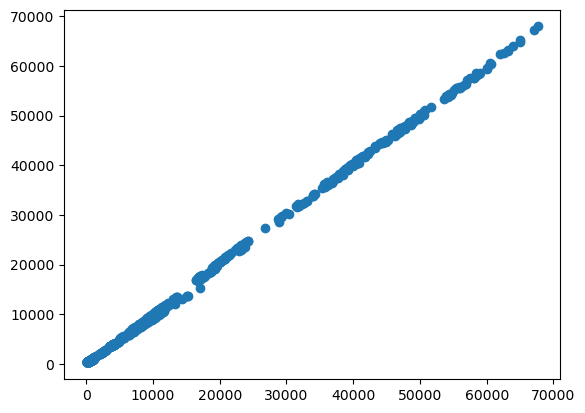

In [149]:
plt.scatter(dfret['Actual'],dfret['Predicted'])


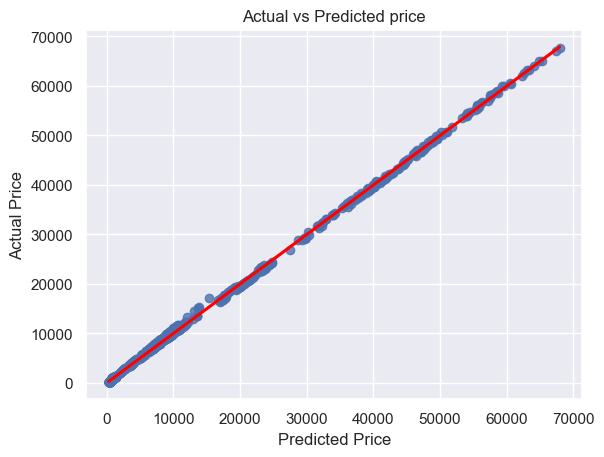

In [180]:
sns.regplot(x=dfret['Predicted'],y=dfret['Actual'],color='b',marker='o',line_kws={'color': 'red'})
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual vs Predicted price')
sns.lineplot(color='red')
plt.show()

<AxesSubplot:ylabel='Frequency'>

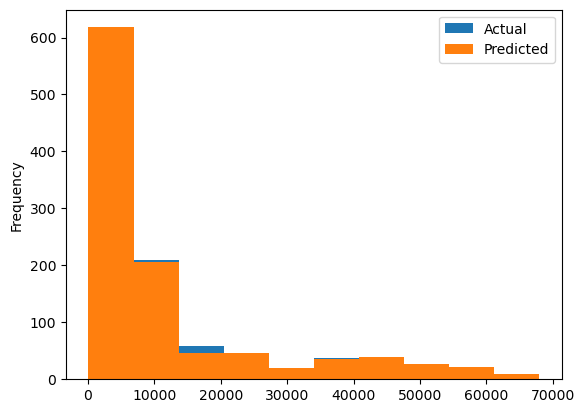

In [154]:
dfret.plot.hist()

In [251]:
dfplot= dfret.reset_index()

In [252]:
dfplot

,date_time,Actual,Predicted
0,2022-03-11,39468.354773,39895.580674
1,2013-10-30,204.200000,378.341233
2,2022-09-29,19444.787771,20009.896961
3,2022-10-06,20161.830615,20704.926422
4,2020-09-04,10197.459823,10259.819458
...,...,...,...
1063,2021-09-09,46085.028616,46127.562829
1064,2018-02-03,8830.163510,8118.631954
1065,2016-09-09,621.912500,771.865722
1066,2017-10-19,5696.380141,5260.287523


In [260]:
dfsortplot=dfplot

In [261]:
dfsortplot.sort_values(by='date_time', inplace = True) 
dfsortplot

,date_time,Actual,Predicted
0,2013-04-28 00:00:00,135.300000,328.948182
1,2013-05-05 00:00:00,116.790000,318.261223
2,2013-05-10 00:00:00,118.780000,319.562421
3,2013-05-12 00:00:00,114.713000,317.221333
4,2013-05-15 00:00:00,114.156000,316.964442
...,...,...,...
1063,2023-01-20 00:00:00,21081.671022,21756.255787
1064,2023-01-21 00:00:00,22705.833679,23378.737491
1065,2023-01-25 00:00:00,22610.010598,23317.963988
1066,2023-01-26 00:00:00,23180.422698,23908.313070


In [262]:
dfsortplot.reset_index(drop=True, inplace=True)
dfsortplot

,date_time,Actual,Predicted
0,2013-04-28 00:00:00,135.300000,328.948182
1,2013-05-05 00:00:00,116.790000,318.261223
2,2013-05-10 00:00:00,118.780000,319.562421
3,2013-05-12 00:00:00,114.713000,317.221333
4,2013-05-15 00:00:00,114.156000,316.964442
...,...,...,...
1063,2023-01-20 00:00:00,21081.671022,21756.255787
1064,2023-01-21 00:00:00,22705.833679,23378.737491
1065,2023-01-25 00:00:00,22610.010598,23317.963988
1066,2023-01-26 00:00:00,23180.422698,23908.313070


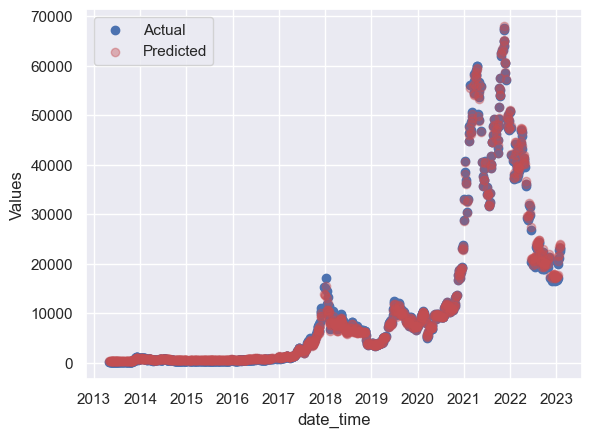

In [263]:

plt.scatter(dfsortplot.date_time, dfsortplot.Actual, label='Actual',color='b')
plt.scatter(dfsortplot.date_time, dfsortplot.Predicted, label='Predicted',color='r',alpha=0.4)
plt.xlabel('date_time')
plt.ylabel('Values')
plt.legend()
plt.show()

<Figure size 2000x1000 with 0 Axes>

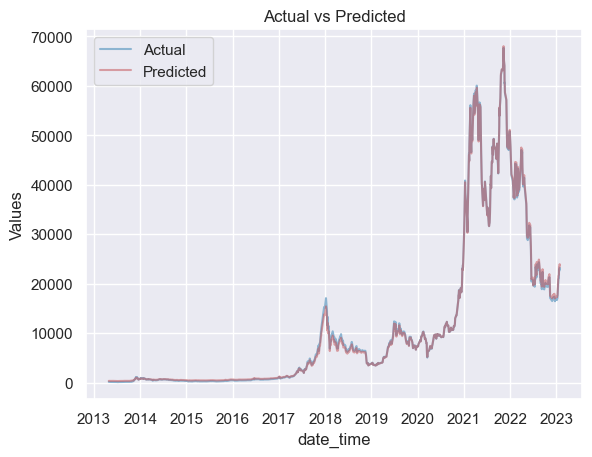

<Figure size 2000x1000 with 0 Axes>

In [264]:
# note seaborn must use date time as index will plot like this
dfseabornplot = dfsortplot.set_index('date_time')
sns.lineplot(data=dfseabornplot, x=dfseabornplot.index, y='Actual', label='Actual')
sns.lineplot(data=dfseabornplot, x=dfseabornplot.index, y='Predicted', label='Predicted',color='r',alpha=0.5)
plt.title("Actual vs Predicted")
plt.xlabel("date_time")
plt.ylabel("Values")
plt.figure(figsize=(20,10))

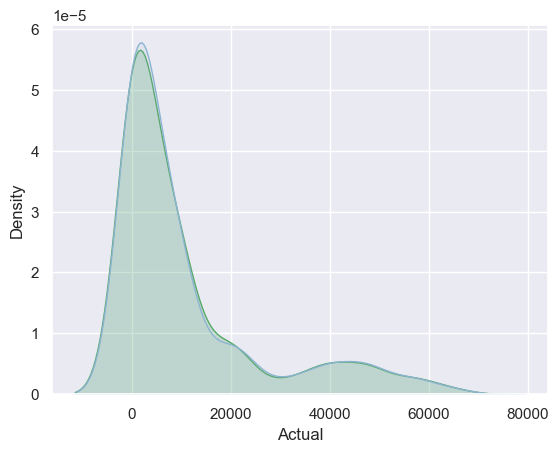

In [265]:
sns.kdeplot(dfsortplot['Actual'],shade=True,color='g')
sns.kdeplot(dfsortplot['Predicted'],shade=True,alpha=0.1)

plt.show()

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/U

<AxesSubplot:xlabel='Predicted', ylabel='Density'>

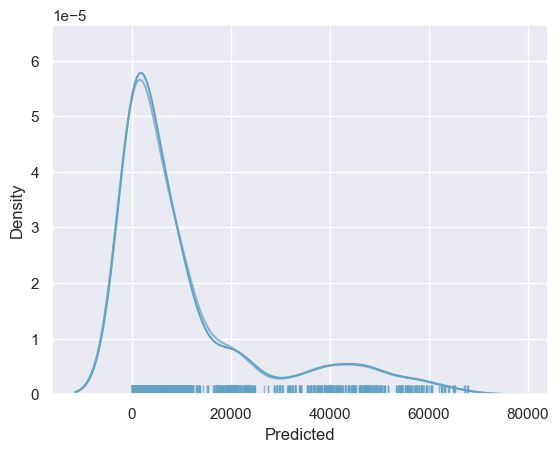

In [266]:
sns.distplot(dfsortplot['Actual'],hist=False, rug=True)
sns.distplot(dfsortplot['Predicted'],hist=False, rug=True)